<a href="https://colab.research.google.com/github/SJharbade/DeepLearning/blob/main/Medi_InsuranceForecast_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read dataset from Git
insu_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insu_data

In [ ]:
# one hot coding to change all the categorical variables in numerical variables
insu_data_onehot = pd.get_dummies(insu_data)
insu_data_onehot.head()

In [ ]:
# Create features and labels
X = insu_data_onehot.drop("charges", axis =1)
y = insu_data_onehot["charges"]

In [ ]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)
# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# compile a model
insurance_model.compile(loss = "mae",
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = "mae"
                        )
#Fit the model
insurance_model.fit(X_train,y_train, epochs =100)


In [ ]:
# Check the result of insurance model on test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

As results from model is not good, with mae 7106 or 7023... that means prediction from our model will be deviated by approx ~7k. We have to improve our model and that is done by the tuning Hyperparameters.. Below are the hypermeters that we will tune and see the result of model
1. Epochs - Increast to 500 and 1000
2. Increase one more dense layer with 50 and 100 units respectively
3. Change optimizer to default one and learnig rate as 0.01 and 0.001

In [ ]:
# New model with 500 Epochs
tf.random.set_seed(42)
# Create model
Insurance_model_ep500 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile Model
Insurance_model_ep500.compile(loss ="mae",
                              optimizer = tf.keras.optimizers.SGD(),
                              metrics ="mae")
# Fit Model
Insurance_model_ep500.fit(X_train,y_train, epochs = 500)

In [ ]:
# Check the result of model with epoch 500
Insurance_model_ep500.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 4518.6821 - mae: 4518.6821


[4518.68212890625, 4518.68212890625]

Not Good but with "**mae**" 4518.6821 is better than previous model.

In [ ]:
# Increasing epochs to 1000 and chekcing resut
tf.random.set_seed(42)
# Create Model
Insurance_model_ep1k = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#Compile Model
Insurance_model_ep1k.compile(loss="mae",
                             optimizer = tf.keras.optimizers.SGD(),
                             metrics = "mae")
# Fit the model
Insurance_model_ep1k.fit( X_train,y_train, epochs = 5000)

In [ ]:
# Check result of model with 1k epochs

Insurance_model_ep1k.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3781.7424 - mae: 3781.7424


[3781.742431640625, 3781.742431640625]

With mae 4388.5034, it's slightly better than previous two models. But can' take this model further. Seems like we have to use other hyper-parametes to increase model result. Tested with 5k epochs as well the value is 3781.7424

In [ ]:
# Tuning hyperparameter by increasing the number of Dense layer....Create one more model with additional dense layer with hideen unit = 50

tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# compile Model
insurance_model_1.compile(loss ="mae",
                          optimizer =tf.keras.optimizers.SGD(),
                          metrics ="mae")
# fit Model
insurance_model_1.fit(X_train,y_train, epochs = 100)



In above model we can see that while we increase DEnse layer with one additional layer. the loss and metrics ie mae is coming as nan. That means we can't add one more dense layer. Let's try to change optimizer to Adam and see the result

In [ ]:
# Changing model as optimizer

# Create Model
Insurance_model_opt = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile Model
Insurance_model_opt.compile(loss="mae",
                            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                            metrics = "mae")

# fir the model
history = Insurance_model_opt.fit(X_train,y_train,epochs =500,verbose = 0)


In [ ]:
# Evaluate the model
Insurance_model_opt.evaluate(X_test,y_test)
# With mae 3163.1780 this model is best till now

9/9 [==============================] - 0s 2ms/step - loss: 3178.1658 - mae: 3178.1658


[3178.165771484375, 3178.165771484375]

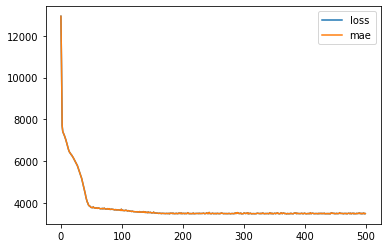

In [ ]:
# plot history, also know as Loss Curve or training curve
pd.DataFrame(history.history).plot()
plt.ylable ="loss"
plt.xlabel = "epochs"